In [5]:
import numpy as np
import csv
import pylab as plt
%matplotlib inline

In [6]:
distributions = [
    [20,20,15,15,15,10,5],
    [5,15,20,25,20,10,5],
    [10,25,25,20,10,7,3],
]

distributions = np.array(distributions)

vmax_cap = [5,10,20,30,40,50,60]

filenames = ["multiV_{}.csv".format(v) for v in vmax_cap]

print filenames

interest_cols = ['Time','pHo']

['multiV_5.csv', 'multiV_10.csv', 'multiV_20.csv', 'multiV_30.csv', 'multiV_40.csv', 'multiV_50.csv', 'multiV_60.csv']


In [7]:
all_files = {}

for filename in filenames:
	with open(filename,'r') as f:
		all_files[filename] = []
		reader = csv.reader(f)
		heads = reader.next()
		colpos = []
		for col in interest_cols:
			colpos.append(heads.index(col))
		for row in reader:
			newdata = [row[c] for c in colpos]
			all_files[filename].append(newdata)

In [20]:
# turn into a single numpy array using time from first
nrows = len(all_files[filenames[0]])
ncols = len(filenames)
time = [i[0] for i in all_files[filenames[0]]]
time = np.array(time)
val = np.zeros((nrows,ncols),np.double)
for i,filename in enumerate(filenames):
	temp = np.array([v[1] for v in all_files[filename]])
	val[:,i] = temp

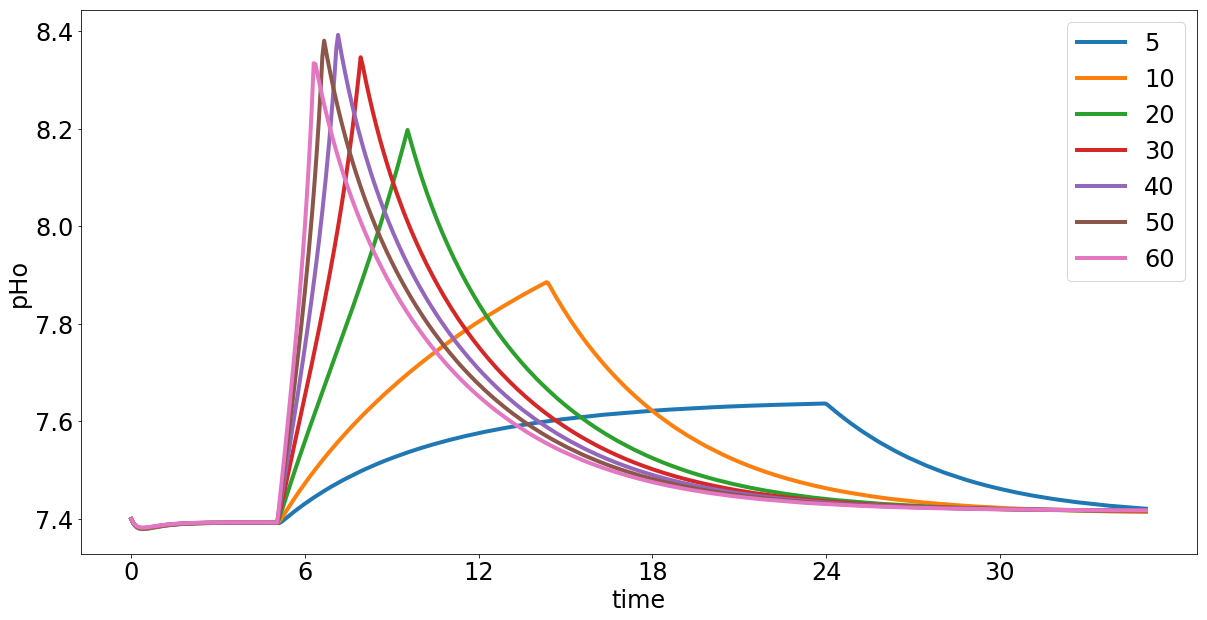

In [48]:
plt.figure(figsize = (20,10))
handles = []
for i in range(len(filenames)):
    h, = plt.plot(time,val[:,i],label = vmax_cap[i],linewidth=4)
    handles.append(h)
tickpoints = np.arange(0,len(time),100)
plt.xticks(tickpoints,["{:.0f}".format(float(t)) for t in time[tickpoints]],fontsize=24)
plt.yticks(fontsize = 24)
locs,labs = plt.xticks()
plt.xlabel("time",fontsize = 24)
plt.ylabel("pHo",fontsize = 24)
plt.legend(handles = handles,fontsize = 24)
plt.savefig("pho.jpg")

In [43]:
with open('collated_pho.csv','w') as f:
	writer = csv.writer(f)
	writer.writerow(["time"] + ["vmax_{}".format(v) for v in vmax_cap])
	for i,row in enumerate(val):
		newrow = [time[i]] + ["{:.4f}".format(v) for v in val[i,:]]
		writer.writerow(newrow)

averaged = np.zeros((len(time),len(distributions)),np.double)
        
with open('distributions.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(["time"] + ["d{}".format(v) for v in range(len(distributions))])
    for i,row in enumerate(val):
        newrow = [time[i]]
        for j,d in enumerate(distributions):
            wsum = (d*val[i,:]).sum()/100.0
            newrow.append("{:.4f}".format(wsum))
            averaged[i,j] = wsum
        writer.writerow(newrow)


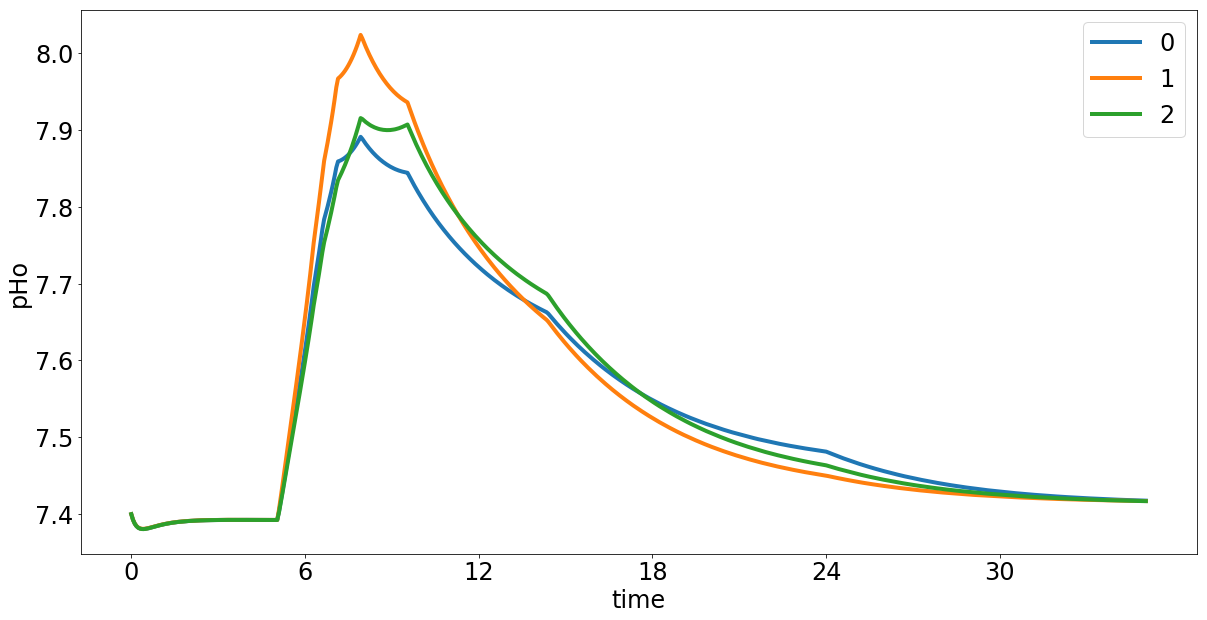

In [47]:
plt.figure(figsize = (20,10))
handles = []
for i in range(len(distributions)):
    h, = plt.plot(time,averaged[:,i],label = i,linewidth=4)
    handles.append(h)
tickpoints = np.arange(0,len(time),100)
plt.xticks(tickpoints,["{:.0f}".format(float(t)) for t in time[tickpoints]],fontsize=24)
plt.yticks(fontsize = 24)
locs,labs = plt.xticks()
plt.xlabel("time",fontsize = 24)
plt.ylabel("pHo",fontsize = 24)
plt.legend(handles = handles,fontsize = 24)
plt.savefig("averaged.jpg")
